In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_13671/1375469573.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:
from scipy.optimize import curve_fit
from copy import copy, deepcopy
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

def int_to_pauli(i,n):
    p = np.base_repr(i,base=4)
    p = '0'*(n-len(p)) + p
    p = p.replace('0','I').replace('1', 'X').replace('2', 'Y').replace('3', 'Z')
    return p

def commute(p,q):
    c = 1
    n = len(p)
    for i in range(n):
        if p[i] != 'I' and q[i] != 'I':
            if p[i] != q[i]:
                c *= -1
    return c

def fidelity_to_error(pauli_fidelity,n):
    N = 4**n
    pauli_error = {}
    for i in range(N):
        p = int_to_pauli(i,n)
        pauli_error[p] = 0
        for j in range(N):
            q = int_to_pauli(j,n)
            pauli_error[p] += pauli_fidelity[q] * commute(p,q) / N
    return pauli_error
    

In [4]:
import random   
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



In [5]:
# filename = str(uuid.uuid4())
# filename+="XX23541_noSE_explicitCNOT_XX_R_0711_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/d2a1fd69-58af-460d-bb96-48e480733e35FTXX13_mapping1345_R_0516_00+11_ExperimentalData", "rb") as fp:
    eab_load_cpy=pickle.load(fp)

In [6]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8]
shots=2000
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

# print (eab_result)


Analyze full set of data without bootstrapping

Parameters: n = 2, C = 20,  L =  [2, 4, 8]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.07068397432566775
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0768222 0.0048574
YI 0.0817079 0.0053365
ZI 0.017702 0.0020128
IX 0.0674739 0.0067934
XX 0.1237211 0.0091751
YX 0.1085756 0.0089567
ZX 0.067788 0.0079919
IY 0.0708047 0.0074469
XY 0.117237 0.0084377
YY 0.1202884 0.0092933
ZY 0.0703844 0.0077707
IZ 0.0228877 0.0023524
XZ 0.0882352 0.0052977
YZ 0.0851818 0.0053252
ZZ 0.0121337 0.0024215


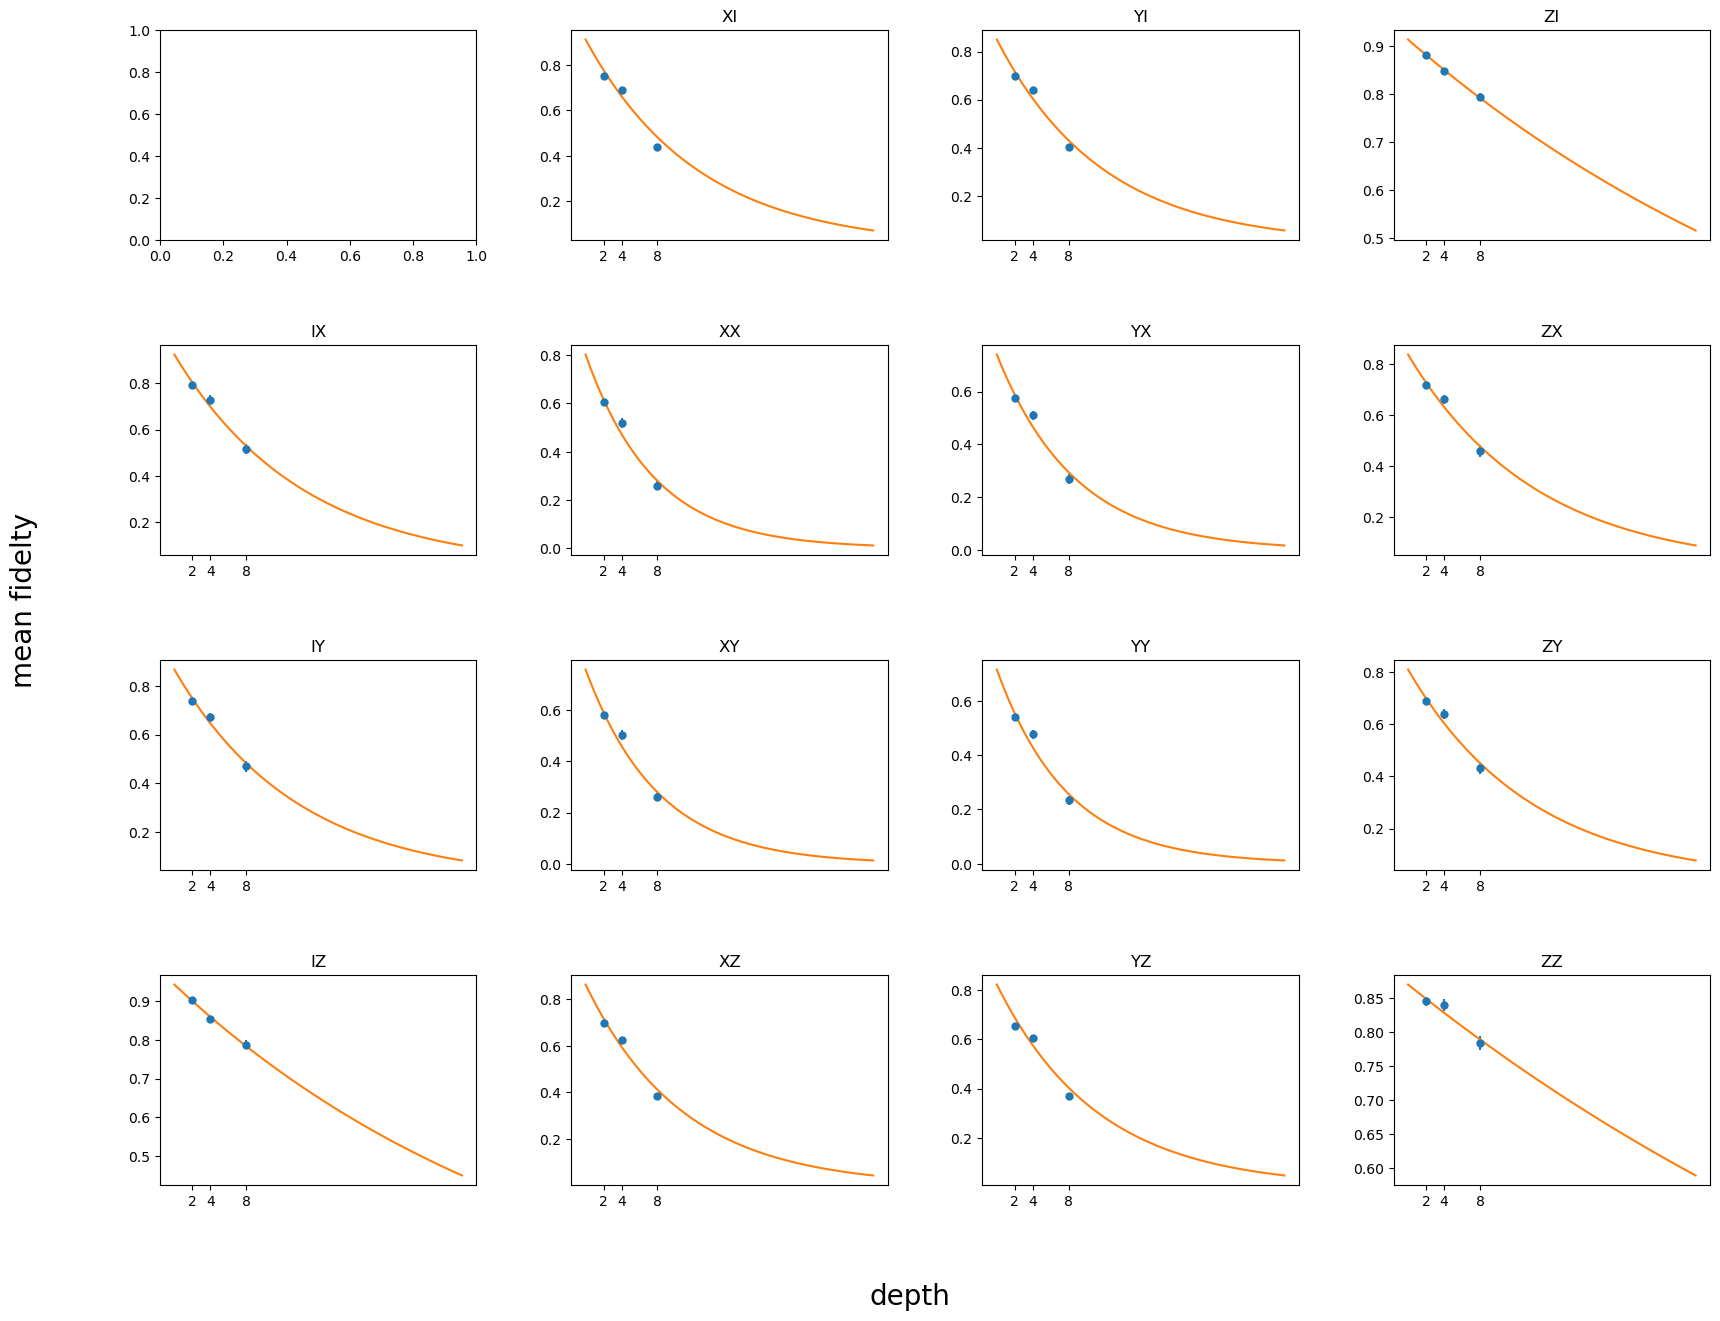

In [8]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

In [9]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.929316
XI -0.0002138
YI 0.001069
ZI 0.0295372
IX 0.0027101
XX 0.0011833
YX 0.0024655
ZX 0.0001957
IY 0.0013157
XY 0.0033661
YY 9.91e-05
ZY 0.0001084
IZ 0.0226002
XZ 0.0013113
YZ -0.0004295
ZZ 0.0053658


scatter plot: result from each circuit

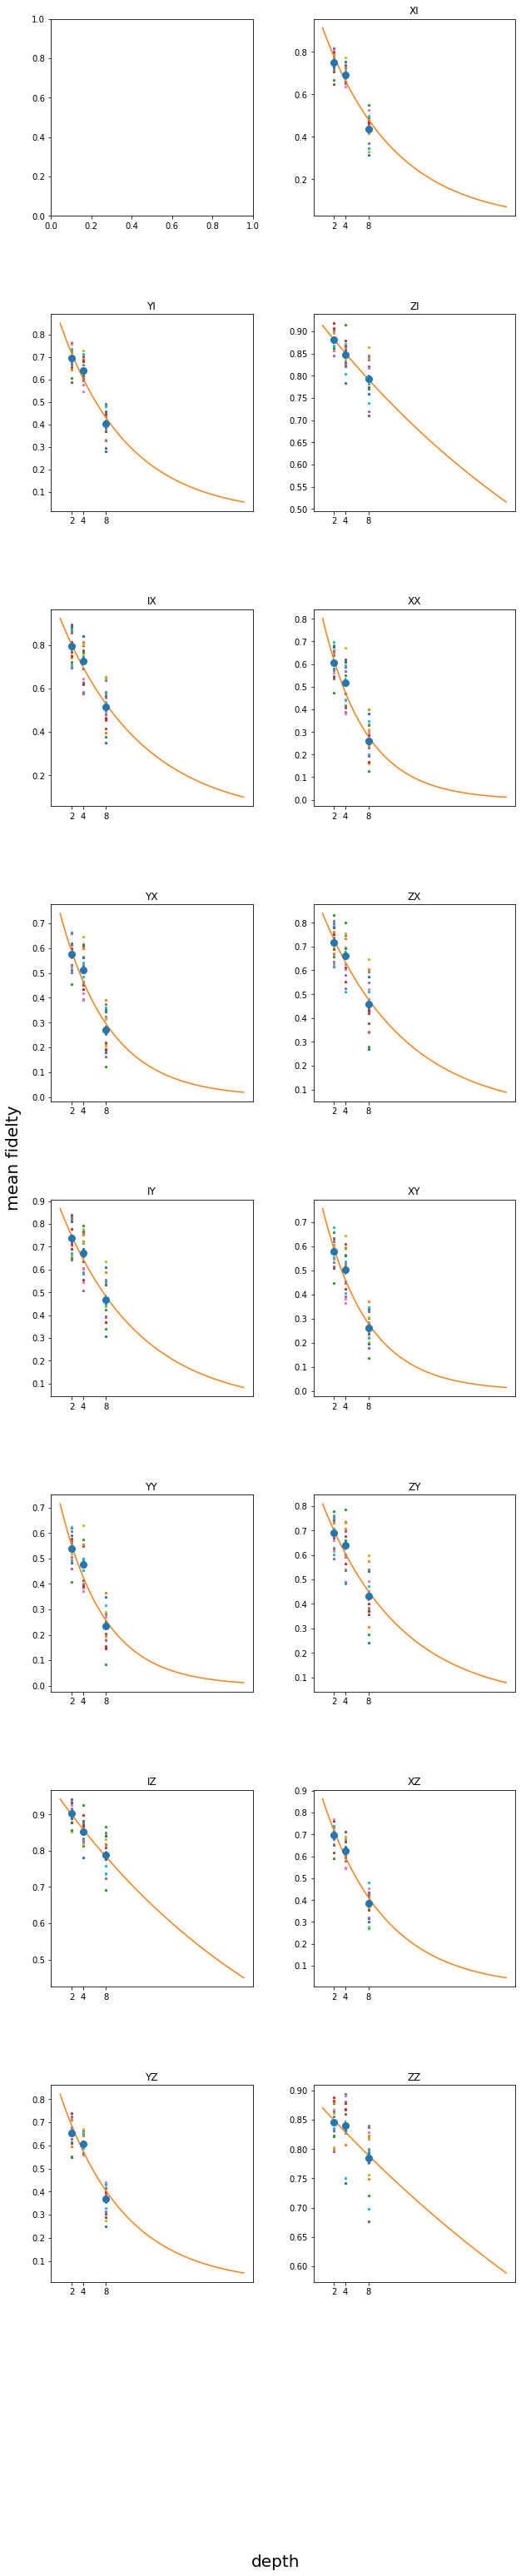

In [14]:
x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(8, 2)
fig.set_figwidth(10)
fig.set_figheight(50)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (8):
    for j in range(2):
        pauli_label=pauli_request_list[2*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
#             print ([tuple(eab_result['fidelity_list'][pauli_label][2])])
            axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=8)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

# data analysis with bootstrapping

full set of data with bootstrapping

In [15]:
import bootstrap

raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
alpha_detail={}
a_detail={}
alpha_error_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        fidelity_list[pauli_label] = alpha_bootstrap #avg pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err_bootstrap #error on pauli fidelity from fit
        a_BS_dic[pauli_label]=a_rtn_frm_fit
        Y_BS_dic[pauli_label]=Y_rtn_frm_fit
        Yerr_BS_dic[pauli_label]=Yerr_rtn_frm_fit 
        alpha_detail[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit


# pauli_label="IX"
# print (Y_BS_dic["IX"][0])    
# print (Yerr_BS_dic["IX"][0])  
# print (a_BS_dic["IX"][0])
# print (alpha_detail[pauli_label][0])


Method I: use the average of the 10 sets of Pauli fidelities from 10 times of resampling in bootstrapping


XI 0.0770535 0.0023454
YI 0.0815731 0.0026258
ZI 0.0178286 0.0009937
IX 0.0670308 0.0038761
XX 0.1243512 0.0074105
YX 0.1101924 0.0040325
ZX 0.0673186 0.0032103
IY 0.0722581 0.0026186
XY 0.1150367 0.0035016
YY 0.1231502 0.004913
ZY 0.070853 0.0038623
IZ 0.0218027 0.0011505
XZ 0.0887503 0.0035769
YZ 0.0850508 0.003219
ZZ 0.0118097 0.0007983
{'IX': [0.9245652794368854, 0.9226714945866565, 0.9262036167734561, 0.9209212169725983, 0.91779894693638, 0.9240453709080384, 0.9224515937223344, 0.9218101998272559, 0.9231676458222047, 0.9258298664663734], 'IY': [0.9202444053739034, 0.9216503118016305, 0.9214608485926661, 0.9197690210057264, 0.9205142854766274, 0.9161675457114611, 0.9176654081513524, 0.9179223793989635, 0.9134075554802475, 0.9154673461560442], 'IZ': [0.9820788071590624, 0.980659821142201, 0.9816532193272751, 0.9830100121315054, 0.9818766709704889, 0.9829743616645278, 0.9826244486025755, 0.9841923211035875, 0.9810519748979342, 0.981592392843405], 'XI': [0.9356986149116936, 0.93756198

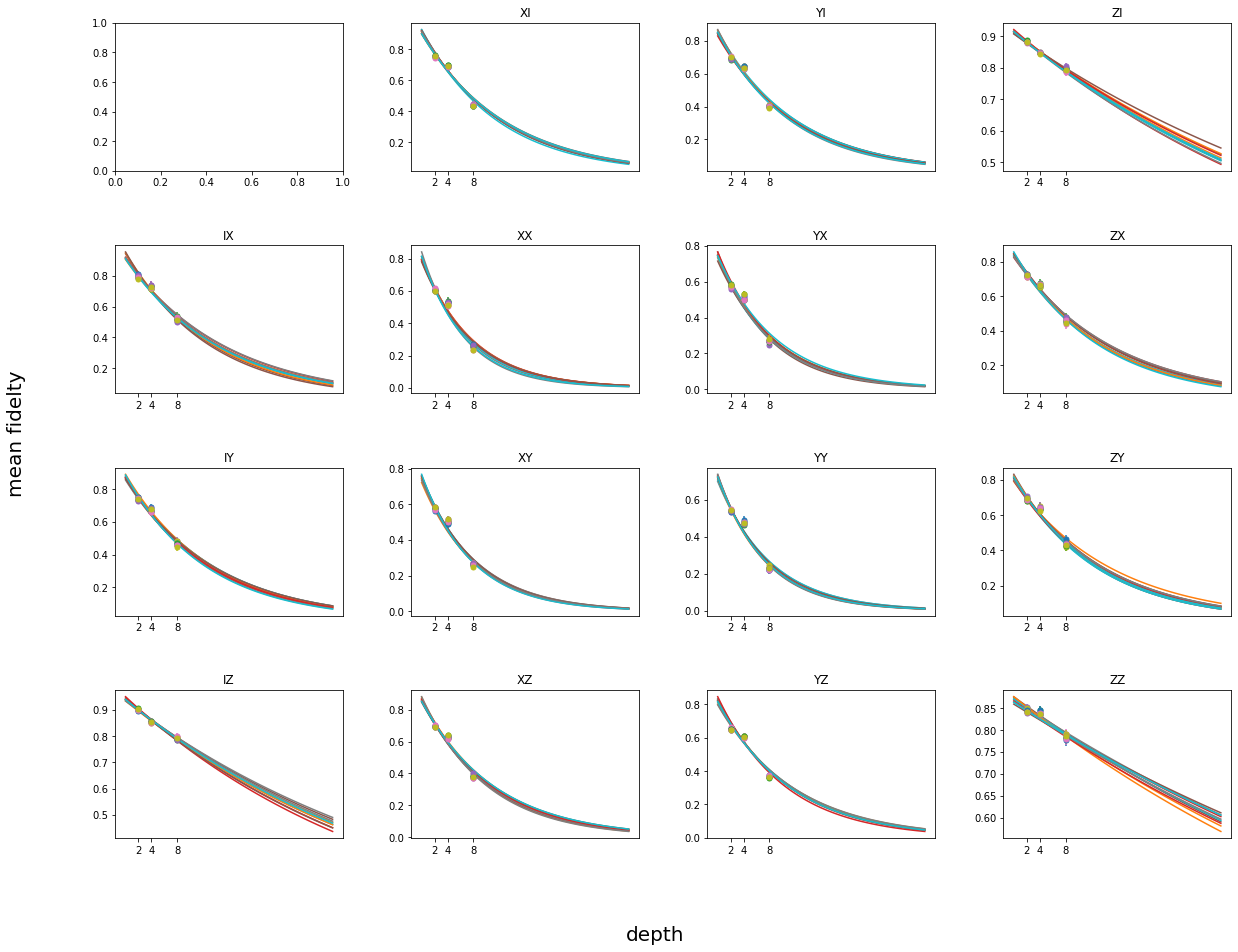

In [16]:
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        continue
    else:
        print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))


x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
            for m in range (10):
                axs[i, j].errorbar(depth,Y_BS_dic[pauli_label][m], yerr=Yerr_BS_dic[pauli_label][m], fmt='o',markersize=5)
                axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_BS_dic[pauli_label][m], alpha_detail[pauli_label][m]))
            axs[i, j].set_title(pauli_label[::-1])

print (alpha_detail)    

Method II: use the average of the 10 sets of Y from resampling as the a new set of Y and do the fit once with the new Y


Parameters: n = 2, C = 20,  L =  [2, 4, 8]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.07037359962765533
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0816894 0.0006052
YI 0.0858316 0.0007674
ZI 0.0182008 0.0003429
IX 0.0672481 0.0012194
XX 0.1179449 0.0018681
YX 0.1161698 0.0015469
ZX 0.0635655 0.0012595
IY 0.0720896 0.0012151
XY 0.117199 0.0013089
YY 0.115383 0.0013111
ZY 0.067596 0.0014126
IZ 0.0217867 0.0003587
XZ 0.0835841 0.0011464
YZ 0.0849492 0.0008423
ZZ 0.0127398 0.000422
{'IX': [0.7546033333333333, 0.6914900000000002, 0.4388833333333334], 'IY': [0.6952533333333333, 0.6396733333333333, 0.40353666666666665], 'IZ': [0.8823433333333334, 0.8471266666666667, 0.7936866666666667], 'XI': [0.7946733333333333, 0.72719, 0.5178266666666668], 'XX': [0.6055400000000001, 0.5229933333333333, 0.25591], 'XY': [0.5762366666666667, 0.51041, 0.26724333333333333], 'XZ': [0.71947, 0.6650133333333332, 0.46035000000000004], 'YI': [0.7405433333333333, 0

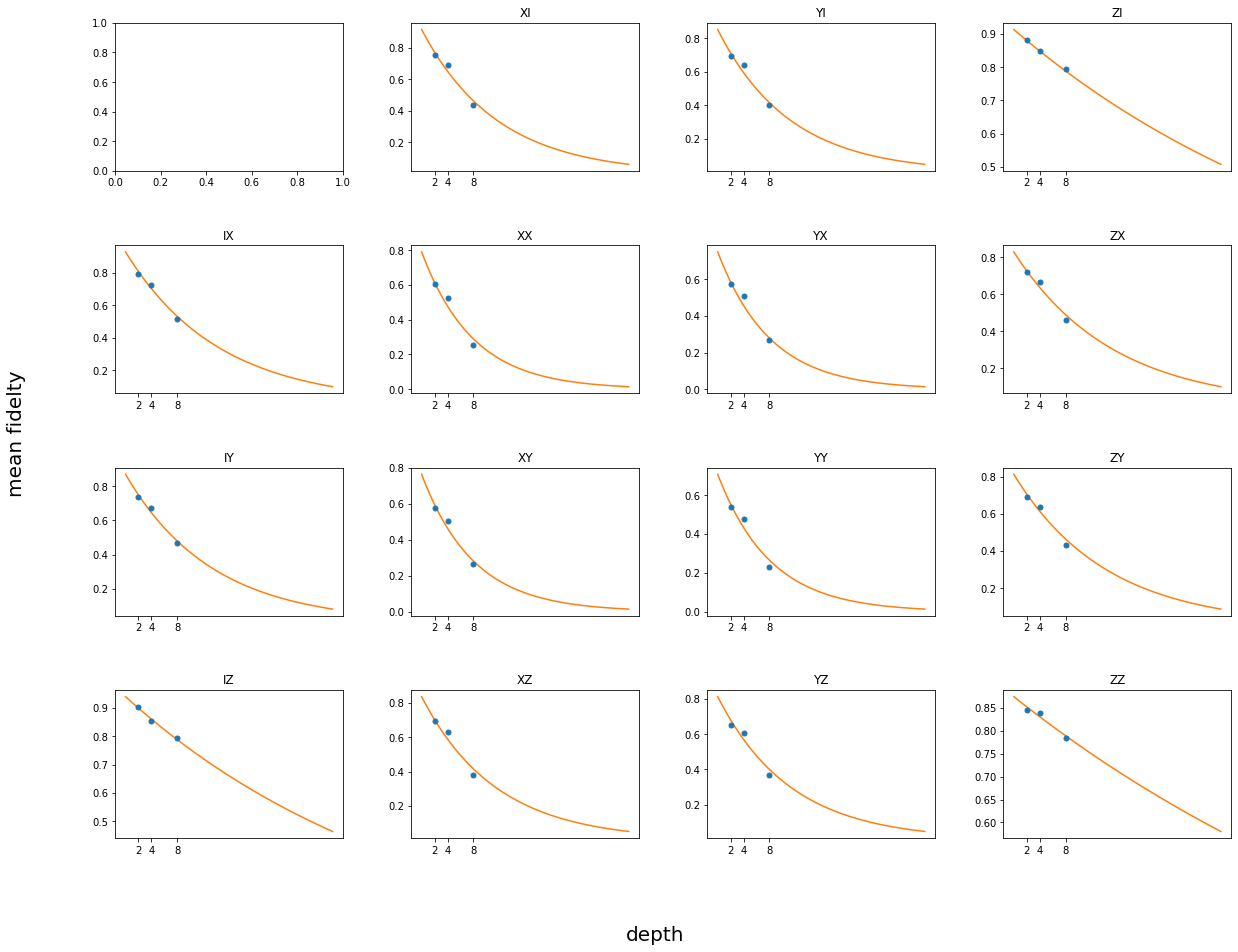

In [18]:
raw_fidelity_list_avg={}
for pauli_label in pauli_request_list:
    raw_fidelity_list_avg[pauli_label]={}
    raw_fidelity_list_avg[pauli_label][2]=[]
    raw_fidelity_list_avg[pauli_label][4]=[]
    raw_fidelity_list_avg[pauli_label][8]=[]
#     raw_fidelity_list_avg[pauli_label][16]=[]
#     raw_fidelity_list_avg[pauli_label][32]=[]
    if (pauli_label=="II"):
        raw_fidelity_list_avg[pauli_label][2]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][4]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][8]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][16]=[1.0]*10
#         raw_fidelity_list_avg[pauli_label][32]=[1.0]*10
    else:
        for i in range (10):
            raw_fidelity_list_avg[pauli_label][2].append(Y_BS_dic[pauli_label][i][0])
            raw_fidelity_list_avg[pauli_label][4].append(Y_BS_dic[pauli_label][i][1])
            raw_fidelity_list_avg[pauli_label][8].append(Y_BS_dic[pauli_label][i][2])
#             raw_fidelity_list_avg[pauli_label][16].append(Y_BS_dic[pauli_label][i][3])
#             raw_fidelity_list_avg[pauli_label][32].append(Y_BS_dic[pauli_label][i][4])


raw_fidelity_list = raw_fidelity_list_avg
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

In [19]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9296264
XI 0.0001809
YI -5.87e-05
ZI 0.0299703
IX 0.0015423
XX 0.0019298
YX 0.0015776
ZX 0.0016074
IY 0.0006249
XY 0.0018233
YY 0.0014813
ZY 0.0003068
IZ 0.0217759
XZ 0.0016518
YZ 0.0005145
ZZ 0.0054456


# Bootstrapping for different number of layers
Obtain the lists of:  
    alpha_detail[pauli_label]=alpha_rtn_frm_fit
    alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit
for different number of layers

plot alpha_detail vs. number of layers

In [ ]:
######dpth=[2,4]
import bootstrap
pathname="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/FTXX13_EAB_00+11_05162023/"
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,4]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d2={}
alpha_error_detail_d2={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d2[pauli_label] = [1.0]*10
        alpha_error_detail_d2[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d2[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d2[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d2)
filename="alpha_detail_d24"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d2, fp)



raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d28={}
alpha_error_detail_d28={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d28[pauli_label] = [1.0]*10
        alpha_error_detail_d28[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d28[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d28[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d2)
filename="alpha_detail_d28"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d28, fp)

######dpth=[2,4,8]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d3={}
alpha_error_detail_d3={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d3[pauli_label] = [1.0]*10
        alpha_error_detail_d3[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d3[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d3[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_2)
filename="alpha_detail_d248"
with open(pathname+filename, "wb") as fp:
    pickle.dump(alpha_detail_d3, fp)


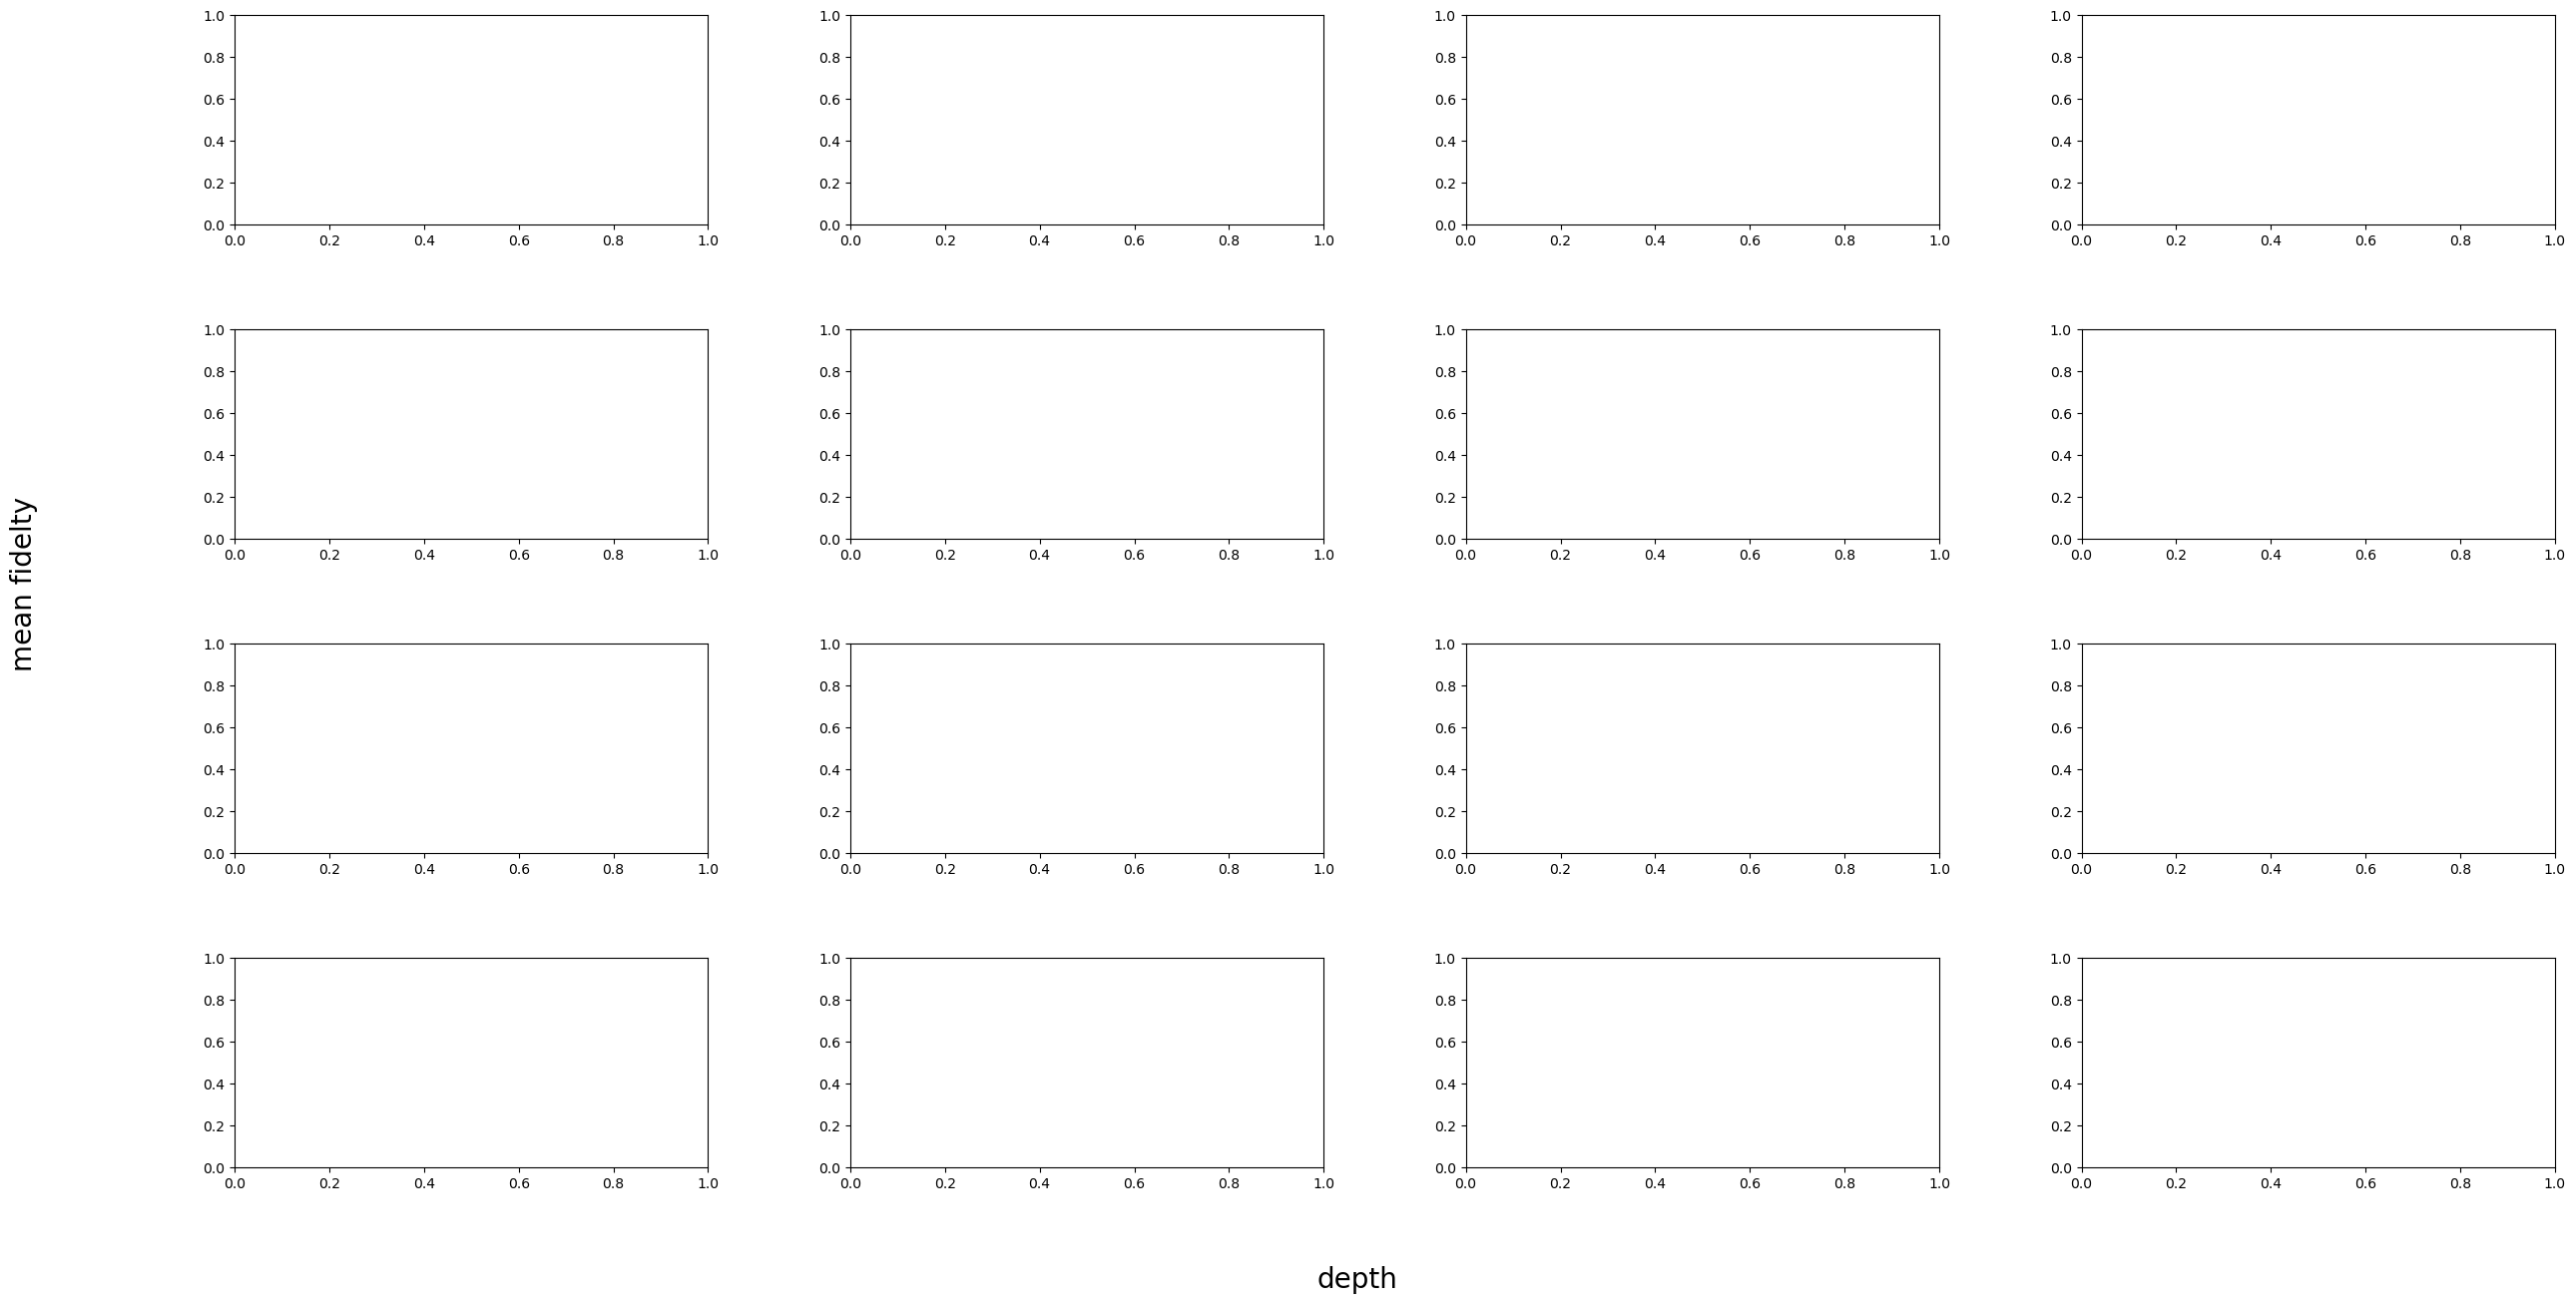

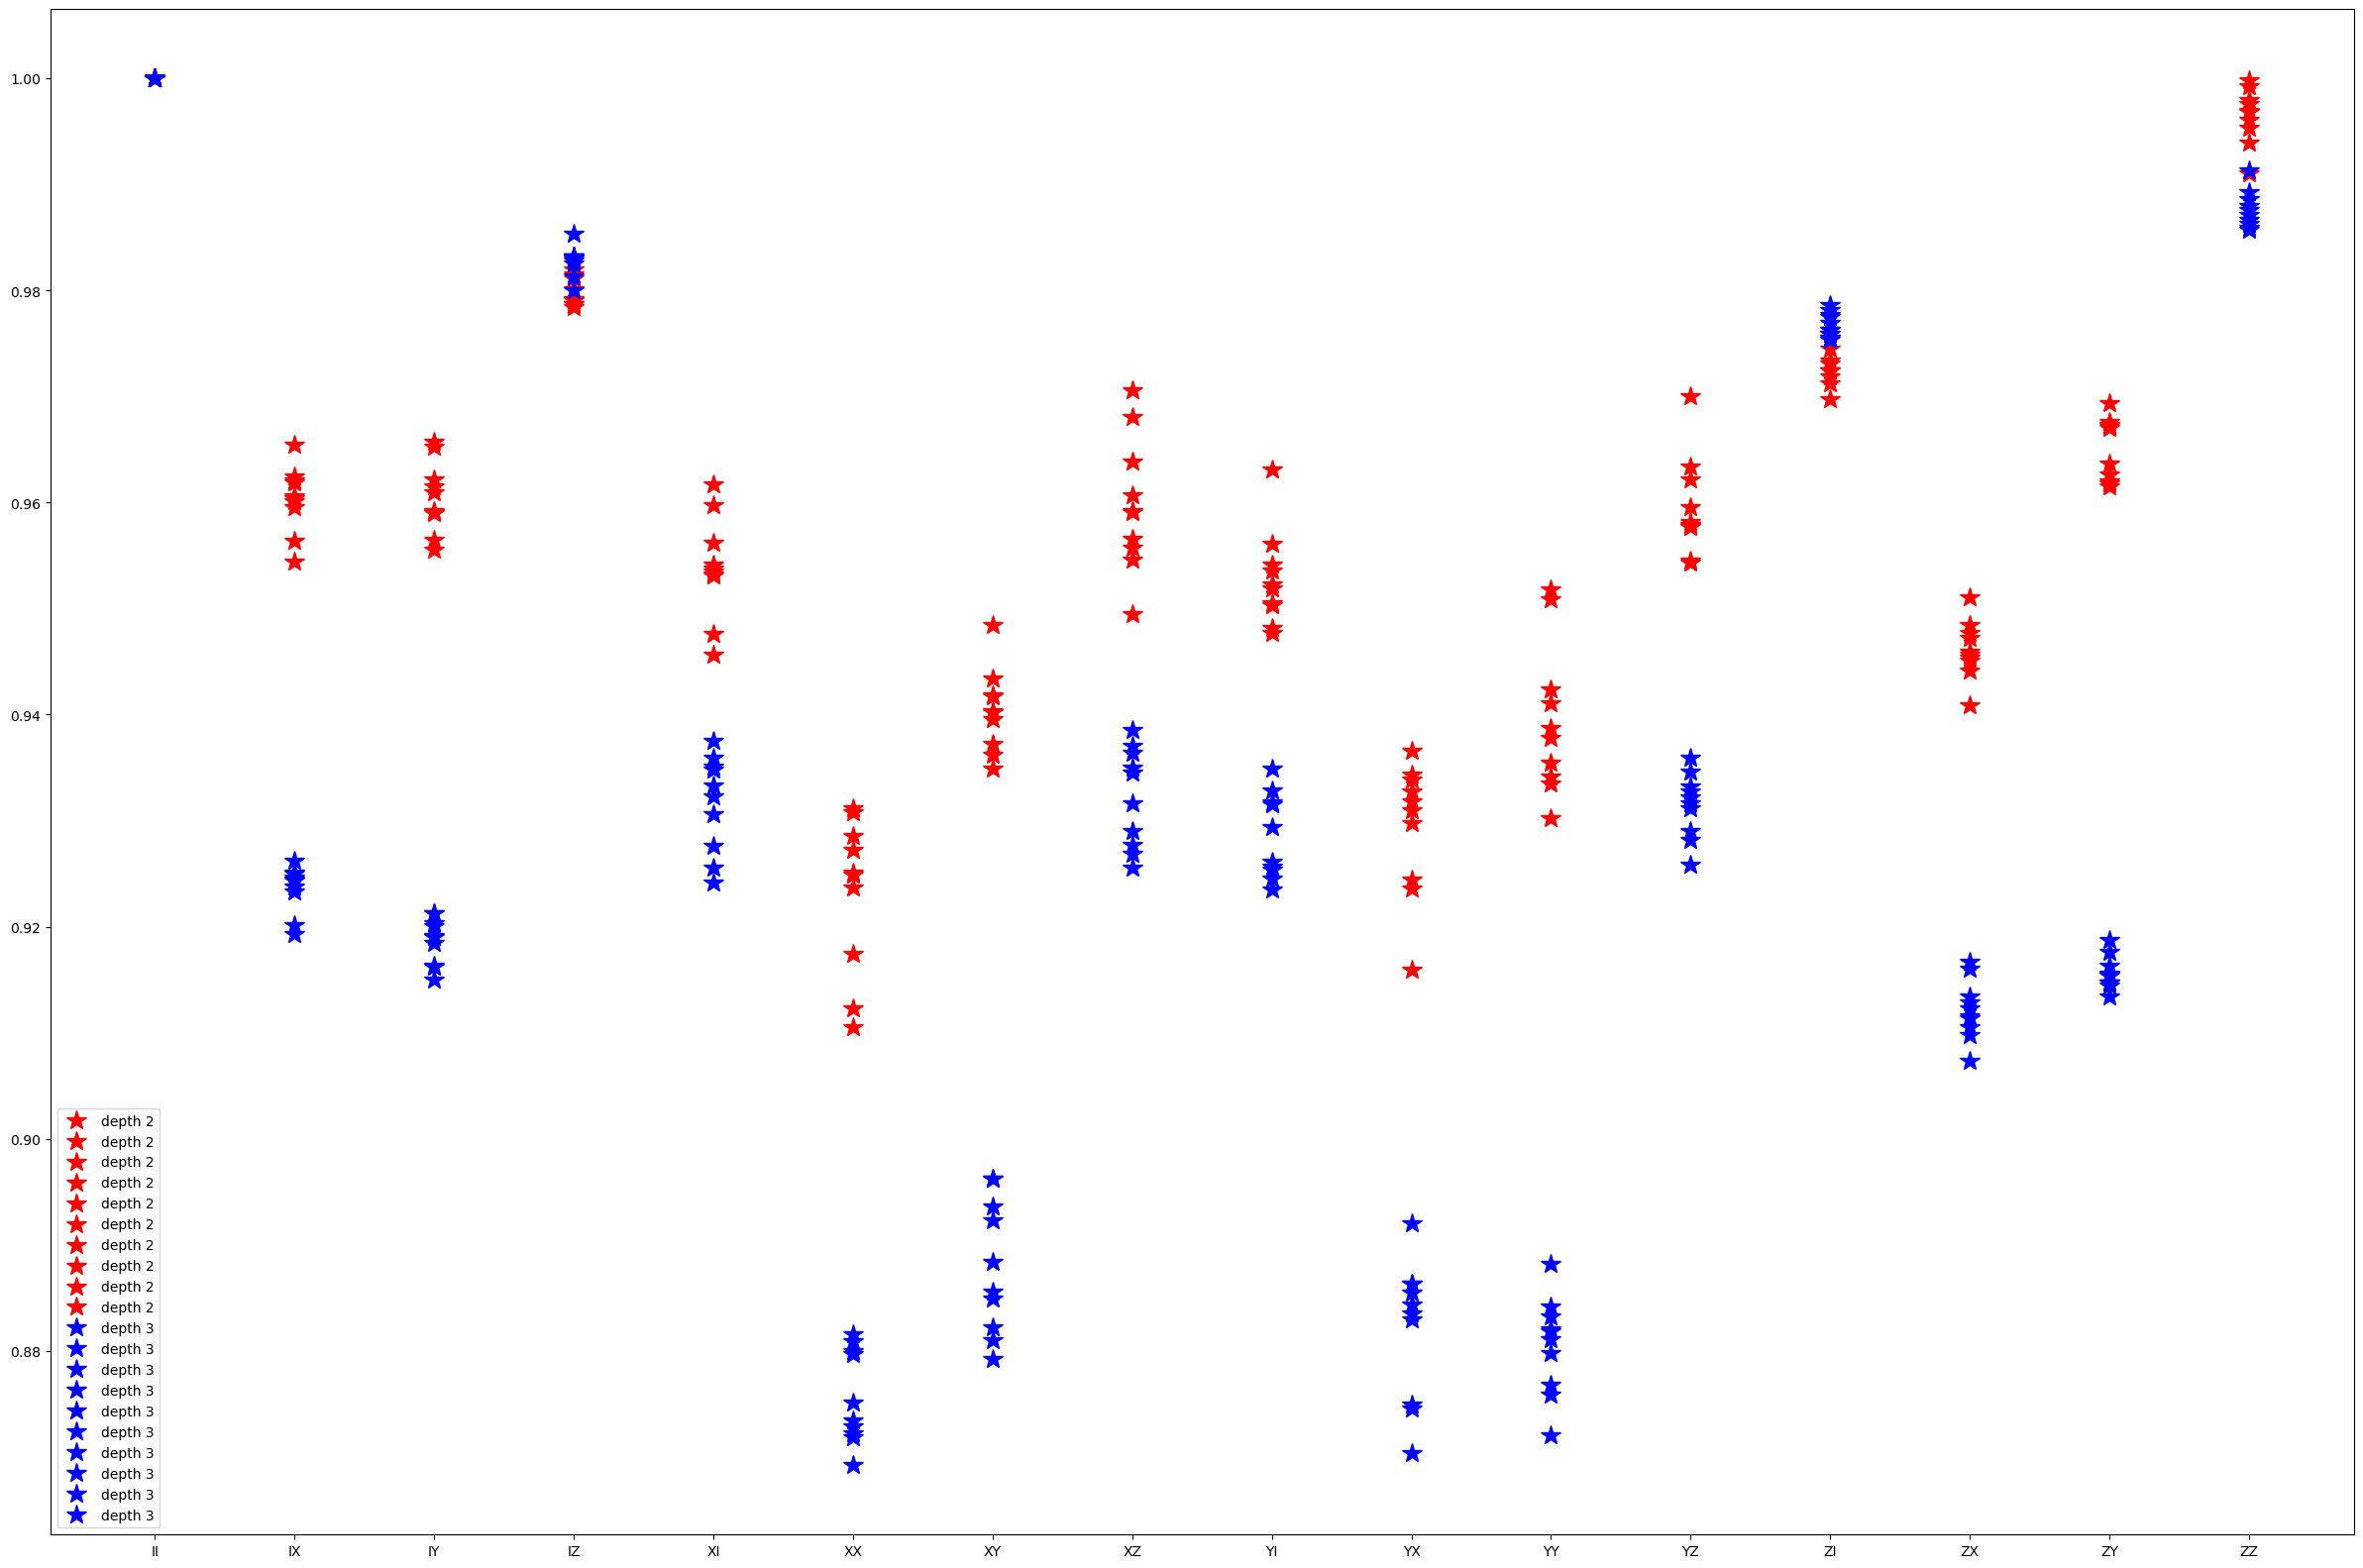

In [10]:
##plot  alpha_detail vs. depth
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
plt.legend()
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

# plt.figure(figsize=(30,20))
#  plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
# plt.legend()